# Teste completo

## Fase 1:
- Normalização: z-score

## Fase 2:
- Balanceamento: smote

## Fase 3:
- Hiperparâmetros: pycaret
    - Regressão Logística
    - Floresta Aleatória


In [1]:
nome_teste =  "TA"

In [ ]:
# Permite acesso ao GDrive

In [ ]:
# Caminho do arquivo no GDrive
path_base = ''
#Onde salvar os arquivos temporários
dir_data = f"data_{nome_teste}"
dir_model = f"model_{nome_teste}"

# Fase 1: Processamento dos Dados

Este arquivo realiza o **pré-processamento** dos dados, preparando-os para as fases subsequentes de modelagem e análise. Abaixo está um resumo das principais etapas e funcionalidades implementadas nesta etapa.

## Etapas do Processamento

### 1. Importação das Bibliotecas
As bibliotecas necessárias para o processamento dos dados são importadas no início do arquivo, como:
- `pandas` para manipulação de dados
- `numpy` para operações numéricas

### 2. Carregamento do Dataset
O arquivo carrega os dados a partir de um arquivo CSV utilizando `pandas`


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
#cria diretórios
try:
    os.mkdir(dir_data)
    print(f"Directory '{dir_data}' created successfully.")
except FileExistsError:
    print(f"Directory '{dir_data}' already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create '{dir_data}'.")
except Exception as e:
    print(f"An error occurred: {e}")
try:
    os.mkdir(dir_model)
    print(f"Directory '{dir_model}' created successfully.")
except FileExistsError:
    print(f"Directory '{dir_model}' already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create '{dir_model}'.")
except Exception as e:
    print(f"An error occurred: {e}")

Directory 'data_TA' already exists.
Directory 'model_TA' already exists.


In [5]:
data = pd.read_csv('../data/heart_2022_with_nans.csv')

## Substituir valores nulos

In [6]:
# Substituir valores nulos nas variáveis numéricas pela média
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)

# Substituir valores nulos nas variáveis categóricas pela moda
data.fillna(data.select_dtypes(include='object').mode().iloc[0], inplace=True)

## Transformação de variáveis categóricas em numéricas

In [7]:
# Cópia do dataframe
data_copy = data.copy()
data_copy.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,None of them,No,...,1.702691,83.07447,28.529842,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,No,6.0,None of them,No,...,1.600000,68.04000,26.570000,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,None of them,No,...,1.570000,63.50000,25.610000,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.650000,63.50000,23.300000,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.570000,53.98000,21.770000,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [8]:
# Lista de colunas de Sim ou Não a serem mapeadas
yes_no_columns = [
    'PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke',
    'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
    'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing',
    'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing',
    'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers',
    'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
    'HighRiskLastYear'
]

# Mapeando "Yes" para 1 e "No" para 0
data_copy[yes_no_columns] = data_copy[yes_no_columns].replace({'Yes': 1, 'No': 0})  #.astype(int) para converter para inteiro após remoção de valores nulos

In [9]:
# Dicionário de mapeamento coluna GeneralHealth
health_mapping = {
    'Excellent': 5,
    'Very good': 4,
    'Good': 3,
    'Fair': 2,
    'Poor': 1
}

data_copy['GeneralHealth'] = data_copy['GeneralHealth'].map(health_mapping)

In [10]:
# Mapeamento coluna Sex
sex_mapping = {
    'Male': 0,
    'Female': 1
}

data_copy['Sex'] = data_copy['Sex'].map(sex_mapping)

In [11]:
# Mapeamento coluna RemovedTeeth
removed_teeth_mapping = {
    'None of them': 0,
    '1 to 5': 1,
    '6 or more, but not all': 2,
    'All': 3
}

data_copy['RemovedTeeth'] = data_copy['RemovedTeeth'].map(removed_teeth_mapping)

In [12]:
# Mapeamento coluna AgeCategory
age_mapping = {
    'Age 18 to 24': 0,
    'Age 25 to 29': 1,
    'Age 30 to 34': 2,
    'Age 35 to 39': 3,
    'Age 40 to 44': 4,
    'Age 45 to 49': 5,
    'Age 50 to 54': 6,
    'Age 55 to 59': 7,
    'Age 60 to 64': 8,
    'Age 65 to 69': 9,
    'Age 70 to 74': 10,
    'Age 75 to 79': 11,
    'Age 80 or older': 12
}

data_copy['AgeCategory'] = data_copy['AgeCategory'].map(age_mapping)

In [13]:
# Mapeamento coluna TetanusLast10Tdap
tetanus_mapping = {
    'No, did not receive any tetanus shot in the past 10 years': 0,
    'Yes, received tetanus shot but not sure what type': 1,
    'Yes, received Tdap': 2,
    'Yes, received tetanus shot, but not Tdap': 3
}

data_copy['TetanusLast10Tdap'] = data_copy['TetanusLast10Tdap'].map(tetanus_mapping)

In [14]:
# Mapeamento da coluna LastCheckupTime
checkup_mapping = {
    "Within past year (anytime less than 12 months ago)": 0,
    "Within past 2 years (1 year but less than 2 years ago)": 1,
    "Within past 5 years (2 years but less than 5 years ago)": 2,
    "5 or more years ago": 3
}

# Aplicar o mapeamento à coluna LastCheckupTime
data_copy['LastCheckupTime'] = data_copy['LastCheckupTime'].map(checkup_mapping)

In [15]:
# Aplicar one-hot encoding
data_copy = pd.get_dummies(data_copy, columns=['SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'CovidPos', 'HadDiabetes'], drop_first=True, dtype='int')

In [16]:
if 'State' in data_copy.columns:
  data_copy = data_copy.drop('State', axis=1)

In [17]:
data_copy.to_csv(f'{dir_data}/Fase1-output_processed_data.csv', index=False)

### Normalização

In [18]:
df = pd.read_csv(f'{dir_data}/Fase1-output_processed_data.csv')

#### Normalização com z-score

In [19]:
# apply normalization techniques 
for column in df.columns: 
    df[column] = (df[column] - df[column].mean()) / df[column].std()    

In [20]:
data_copy.to_csv(f'{dir_data}/Fase1-output_processed_data_normalized.csv', index=False)

# Fase 2: Divisão dos Dados
Este arquivo realiza a **divisão dos dados**, preparando-os para as fases subsequentes de modelagem e treinamento dos algoritmos de aprendizado de máquina. Abaixo está um resumo das principais etapas e funcionalidades implementadas nesta fase.

## Etapas da Divisão dos Dados

### 1. Importação das Bibliotecas
As bibliotecas necessárias para a criação e avaliação dos modelos são importadas, como:
- `pandas` para manipulação de dados
- `sklearn.model_selection` para a função train_test_split, que realiza a divisão dos dados

### 2. Definição das Variáveis Independentes e Dependentes
As variáveis são definidas para a divisão:

- `X`: Contém as variáveis independentes, ou seja, todas as colunas exceto a variável alvo.
- `y`: Contém a variável dependente, que neste caso é a coluna que indica se houve um ataque cardíaco `HadHeartAttack`.

### 3. Divisão dos Dados
 Os dados são divididos em conjuntos de treino e teste para avaliar o desempenho dos modelos. Esta divisão é realizada utilizando a função `train_test_split` do sklearn.

- `Treino (X_train, y_train)`: Usado para treinar os modelos.
- `Teste (X_test, y_test)`: Usado para avaliar a performance do modelo.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv(f'{dir_data}/Fase1-output_processed_data_normalized.csv')

In [23]:
# Definir as variáveis independentes (X) e dependentes (y)
X = data.drop(columns=['HadHeartAttack'])  # Todas as colunas exceto a variável alvo
y = data['HadHeartAttack']  # A variável alvo

In [24]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Salvar os dados divididos
save_to = f'{dir_data}/Fase2-output_data_splits.pkl'
joblib.dump((X_train, X_test, y_train, y_test), save_to)
print(f"Dados divididos salvos em {save_to}")

Dados divididos salvos em data_TA/Fase2-output_data_splits.pkl


In [26]:
# Salvar os dados de teste
save_to = f'{dir_data}/Fase2-output_data_test.pkl'
joblib.dump((X_test, y_test), save_to)
print(f"Dados de teste salvos em {save_to}")

Dados de teste salvos em data_TA/Fase2-output_data_test.pkl


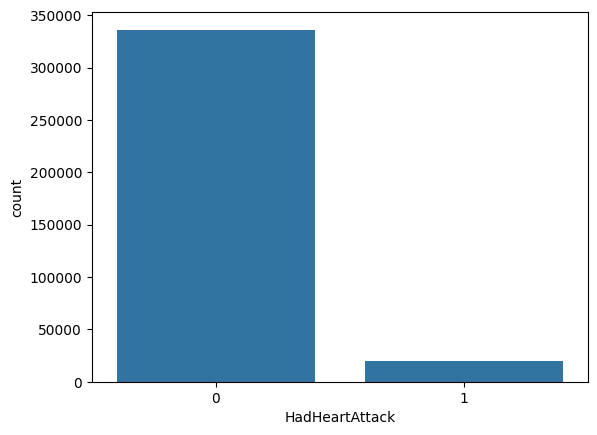

HadHeartAttack
0    0.943921
1    0.056079
Name: proportion, dtype: float64


In [27]:
sns.countplot(x=y_train)
plt.show()

# Ver proporção das classes
print(y_train.value_counts(normalize=True))

# Fase 3 - Balanceamento dos Dados

Este arquivo implementa o balanceamento das classes da variável-alvo para evitar que o modelo de aprendizado de máquina se torne enviesado para a classe majoritária. Para isso, foi utilizado o SMOTE (Synthetic Minority Over-sampling Technique), uma técnica que cria amostras sintéticas da classe minoritária, equilibrando assim a distribuição das classes no conjunto de dados.

## Etapas do Balanceamento dos Dados

### 1. **Carregamento dos Dados**  
O conjunto de dados de treino é carregado a partir do arquivo salvo na fase anterior, possibilitando a continuação do fluxo de preparação.

### 2. **Aplicação do SMOTE para Balanceamento das Classes**
Foi utilizado o SMOTE para gerar amostras sintéticas da classe minoritária no conjunto de treino. Essa técnica ajuda a balancear as classes, evitando que o modelo aprenda de forma enviesada para a classe mais frequente

### 3. **Verificação das Proporções das Classes**
Após a aplicação do SMOTE, foi exibido as novas proporções das classes no conjunto de dados de treino para confirmar o balanceamento

### 4. Salvando Dados Balanceados
Por fim, os dados balanceados são salvos em um arquivo para serem utilizados na próxima fase de treinamento e teste dos modelos.

In [28]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib

In [29]:
# Carregar os dados de treino e teste
X_train, X_test, y_train, y_test = joblib.load(f'{dir_data}/Fase2-output_data_splits.pkl')

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Exibir as novas proporções
print("Proporções após SMOTE:")
print(y_resampled.value_counts(normalize=True))

# Salvar os dados reamostrados
joblib.dump((X_resampled, y_resampled), f'{dir_data}/Fase3-output_data_resampled.pkl')

Proporções após SMOTE:
HadHeartAttack
0    0.5
1    0.5
Name: proportion, dtype: float64


['data_TA/Fase3-output_data_resampled.pkl']

In [30]:
!date

qui 05 dez 2024 10:02:15 -03


In [31]:
from pycaret.classification import setup
from pycaret.classification import compare_models
from pycaret.classification import automl
from pycaret.classification import tune_model

import joblib
from tqdm.notebook import tqdm
import pandas as pd

In [32]:
# Carregar os dados de treino balanceados
# X_resampled, y_resampled = joblib.load('/content/drive/MyDrive/Orientacoes/Orientacoes/2024/Heloisa/data/Fase3-output_data_resampled.pkl')
X_resampled, y_resampled = joblib.load(f'{dir_data}/Fase3-output_data_resampled.pkl')

# Carregar os dados de teste
# X_test, y_test = joblib.load('/content/drive/MyDrive/Orientacoes/Orientacoes/2024/Heloisa/data/Fase2-output_data_test.pkl')
X_test, y_test = joblib.load(f'{dir_data}/Fase2-output_data_test.pkl')

# Concatena a base de treino em um único dataframe
train_data = pd.concat([X_resampled, y_resampled], axis=1)

# Concatena a base de teste em um único dataframe
test_data = pd.concat([X_test, y_test], axis=1)

# Concatena tudo em uma única base
data = pd.concat([train_data, test_data], ignore_index=True)

In [33]:
train_data_pycaret = setup(data = train_data, target = 'HadHeartAttack', use_gpu=False)

,Description,Value
0,Session id,1347
1,Target,HadHeartAttack
2,Target type,Binary
3,Original data shape,"(672270, 49)"
4,Transformed data shape,"(672270, 49)"
5,Transformed train set shape,"(470588, 49)"
6,Transformed test set shape,"(201682, 49)"
7,Numeric features,48
8,Preprocess,True
9,Imputation type,simple


In [34]:
%%time
models = compare_models(include = ['rf', 'lr'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9546,0.9909,0.9569,0.9526,0.9547,0.9092,0.9093,30.3370
lr,Logistic Regression,0.8826,0.9510,0.8806,0.8842,0.8824,0.7653,0.7653,24.1580


CPU times: user 3min 10s, sys: 3.98 s, total: 3min 14s
Wall time: 9min 48s


In [35]:
%%time
#Picking the winner
best_model = automl(optimize = 'Accuracy')

#Fine-tuning the best model
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8487,0.9264,0.8447,0.8515,0.8480,0.6973,0.6973
1,0.8483,0.9264,0.8501,0.8470,0.8485,0.6965,0.6965
2,0.8513,0.9284,0.8525,0.8505,0.8515,0.7027,0.7027
3,0.8518,0.9293,0.8547,0.8498,0.8522,0.7036,0.7036
4,0.8483,0.9258,0.8479,0.8485,0.8482,0.6965,0.6965
5,0.8460,0.9253,0.8450,0.8467,0.8458,0.6920,0.6920
6,0.8474,0.9262,0.8465,0.8480,0.8472,0.6948,0.6948
7,0.8505,0.9274,0.8496,0.8513,0.8504,0.7011,0.7011
8,0.8503,0.9285,0.8509,0.8499,0.8504,0.7007,0.7007


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [36]:
best_model


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=1347, verbose=0,
                       warm_start=False)

In [37]:
print("Fim.")

Fim.


In [38]:
!date

qui 05 dez 2024 11:26:13 -03


## Teste do modelo com os dados de teste

In [39]:
# Testa o modelo com os dados de teste
from pycaret.classification import predict_model
from pycaret.classification import plot_model
from sklearn.metrics import confusion_matrix
y_predict = predict_model(best_model, data=X_test)

### Matriz de confusão

In [40]:
cm = confusion_matrix(y_test, y_predict['prediction_label'])

In [41]:
df_cm = pd.DataFrame(cm)
df_cm['total'] = df_cm[0] + df_cm[1]
df_cm['percent_0'] = df_cm[0] / df_cm['total'] * 100
df_cm['percent_1'] = df_cm[1] / df_cm['total'] * 100
df_cm.round(2)

,0,1,total,percent_0,percent_1
0,80128,3761,83889,95.52,4.48
1,3428,1710,5138,66.72,33.28


### Salvando o modelo

In [42]:
from pycaret.classification import save_model
from pycaret.classification import load_model

In [43]:
#Salvando o modelo

save_model(best_model, f'{dir_model}/best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Sex', 'GeneralHealth',
                                              'PhysicalHealthDays',
                                              'MentalHealthDays',
                                              'LastCheckupTime',
                                              'PhysicalActivities', 'SleepHours',
                                              'RemovedTeeth', 'HadAngina',
                                              'HadStroke', 'HadAsthma',
                                              'HadSkinCancer', 'HadCOPD',
                                              'HadDepressiveDisorder',
                                              'HadKidneyDisease', 'HadArthr...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini'

In [44]:
# functional API
loaded_model = load_model(f'{dir_model}/best_model')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Sex', 'GeneralHealth',
                                             'PhysicalHealthDays',
                                             'MentalHealthDays',
                                             'LastCheckupTime',
                                             'PhysicalActivities', 'SleepHours',
                                             'RemovedTeeth', 'HadAngina',
                                             'HadStroke', 'HadAsthma',
                                             'HadSkinCancer', 'HadCOPD',
                                             'HadDepressiveDisorder',
                                             'HadKidneyDisease...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     

## Feature importance

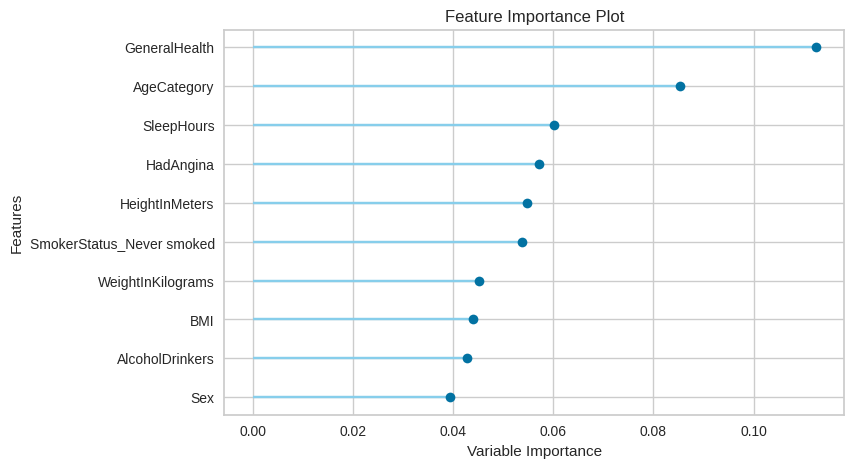

In [45]:
plot_model(best_model, plot='feature')